In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import csv
import random
from datetime import datetime, timedelta
%matplotlib inline 
sns.set_style('darkgrid')

import warnings 
warnings.filterwarnings('ignore')

In [ ]:
# Define the column names
columns = ["Date", "Drug1", "Drug2", "Drug3", "Drug4", "Drug5", "Drug6", "Drug7", "Drug8",
           "Drug1_Sales", "Drug2_Sales", "Drug3_Sales", "Drug4_Sales", "Drug5_Sales",
           "Drug6_Sales", "Drug7_Sales", "Drug8_Sales"]

# Generate data for each column
data = []
start_date = datetime(2023, 5, 1)
for _ in range(30):
    row = []
    row.append(start_date.strftime("%Y-%m-%d"))
    start_date += timedelta(days=1)
    for _ in range(8):
        row.append(random.uniform(0, 50))
    for _ in range(8):
        row.append(random.uniform(0, 30000))
    data.append(row)

# Write the data to a CSV file
filename = "pivot.csv"
with open(filename, "w", newline="") as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(columns)
    writer.writerows(data)

print(f"CSV file '{filename}' has been created successfully!")

CSV file 'pivot.csv' has been created successfully!


In [ ]:


# Read the CSV file into a dataframe
df = pd.read_csv("pivot.csv")
df.head()

,Date,Drug1,Drug2,Drug3,Drug4,Drug5,Drug6,Drug7,Drug8,Drug1_Sales,Drug2_Sales,Drug3_Sales,Drug4_Sales,Drug5_Sales,Drug6_Sales,Drug7_Sales,Drug8_Sales
0,2023-05-01,3.220848,39.873358,48.665898,18.703000,22.126050,30.468226,29.296801,0.836810,4982.280509,9194.547902,13897.860289,9041.540998,20465.003133,29985.120828,17228.198176,3038.118062
1,2023-05-02,7.072352,39.722481,12.898269,30.421477,36.384288,15.734339,19.363534,9.632322,22974.123078,8299.959163,25989.853469,9952.166063,9556.424485,26860.085556,28429.858771,21075.067718
2,2023-05-03,6.112121,8.633324,6.241289,33.326549,25.689070,21.492735,6.236754,39.747775,22872.425524,24446.445890,984.359077,28947.011093,18105.572501,3005.942520,3150.589126,5972.304883
3,2023-05-04,9.437734,33.322434,33.900113,7.353068,25.195005,24.245112,23.963960,7.101563,23312.646085,19589.314614,4454.200605,7882.263309,22147.334697,17176.016118,14339.204292,1694.359562
4,2023-05-05,41.989096,10.657003,34.224860,31.924356,31.114505,36.644959,4.534685,14.580034,4876.311070,28784.111495,10747.973354,4028.366383,20406.153898,24404.528389,23903.199341,20302.747257


In [ ]:
df.tail()

,Date,Drug1,Drug2,Drug3,Drug4,Drug5,Drug6,Drug7,Drug8,Drug1_Sales,Drug2_Sales,Drug3_Sales,Drug4_Sales,Drug5_Sales,Drug6_Sales,Drug7_Sales,Drug8_Sales
25,2023-05-26,13.700162,13.244990,8.129711,35.186295,49.409218,3.136373,1.325069,24.889754,1812.270370,16921.360390,16244.637624,20497.222436,6769.375744,17666.191831,19550.841127,13739.261790
26,2023-05-27,33.756515,25.770315,27.444170,19.145848,23.154091,6.453408,1.010019,44.706300,18228.697105,5777.895551,26018.828097,27204.866812,27644.862713,28319.281092,18281.439838,1248.581606
27,2023-05-28,15.865012,7.747234,18.122497,0.375320,40.449216,44.272191,28.543313,22.807094,3153.253503,17363.234267,22108.515568,24469.925002,25188.671055,18581.973318,8777.743518,11974.948692
28,2023-05-29,41.422049,1.641070,25.250828,45.003210,19.049309,24.615424,17.343429,9.342222,15377.312679,25783.416408,9065.749184,22273.114132,16826.442396,19648.046746,8047.473439,9116.377317
29,2023-05-30,49.520995,48.517550,17.186990,16.197306,41.813541,4.789760,21.767619,47.576386,28320.790702,12441.242136,28686.021240,22520.663767,19515.227526,9287.627050,308.770110,8699.138444


In [ ]:
df.shape

(30, 17)

In [ ]:
df['Date']=pd.to_datetime(df['Date'])
df.set_index(['Date'],inplace=True)

**Check for distribution and skewness using plots**

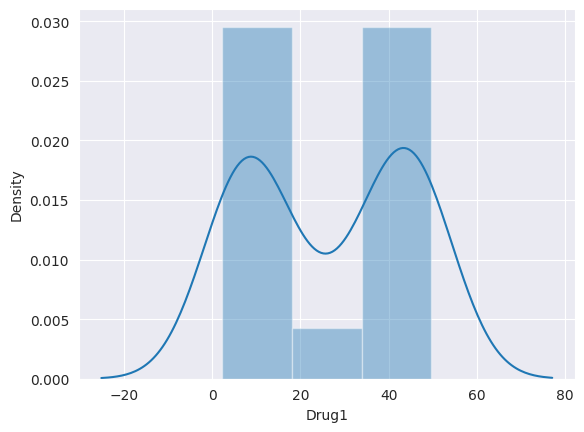

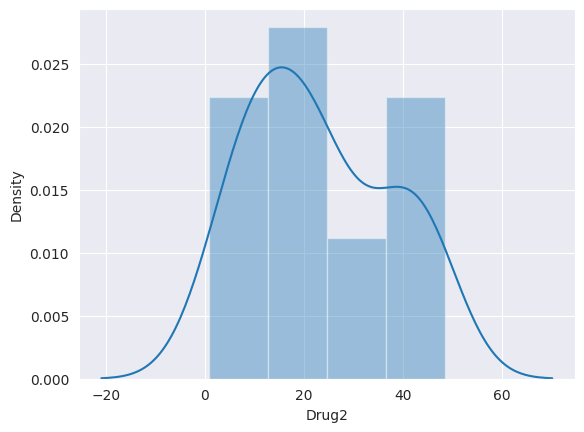

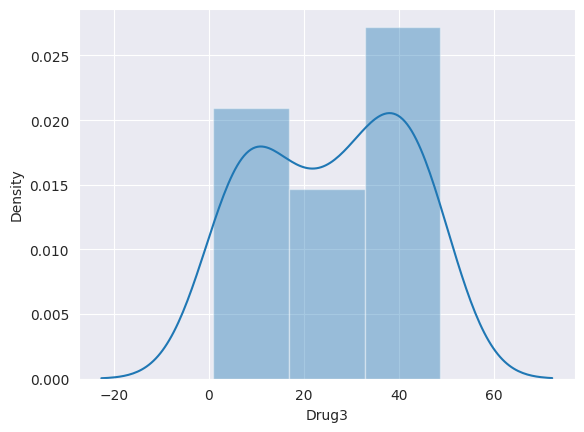

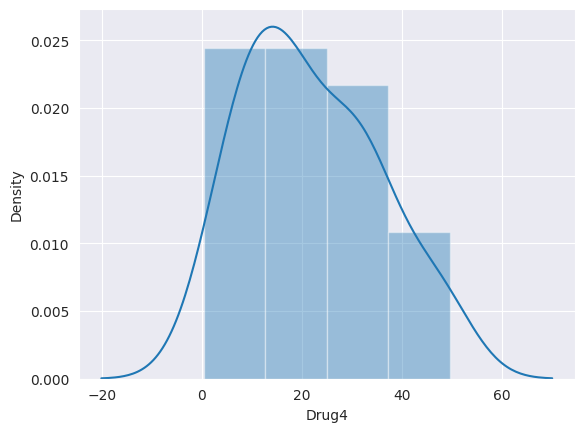

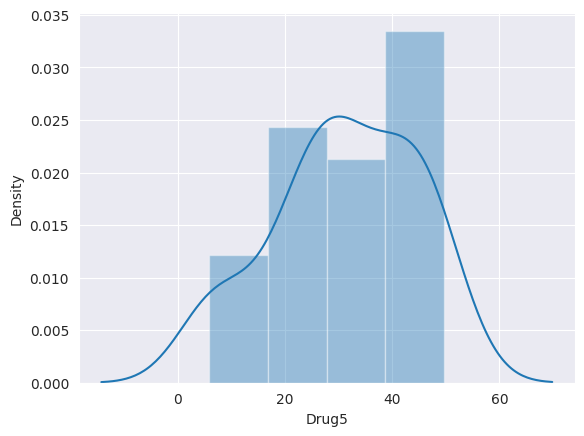

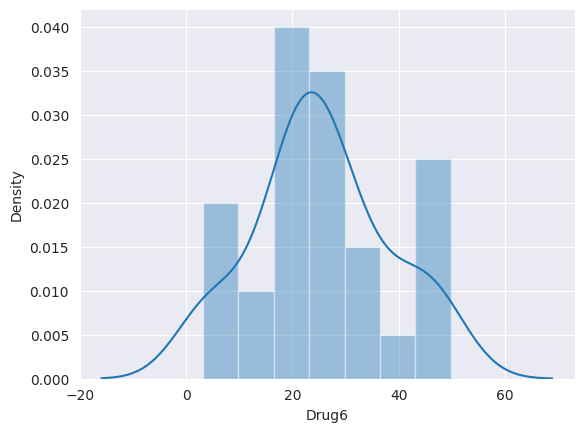

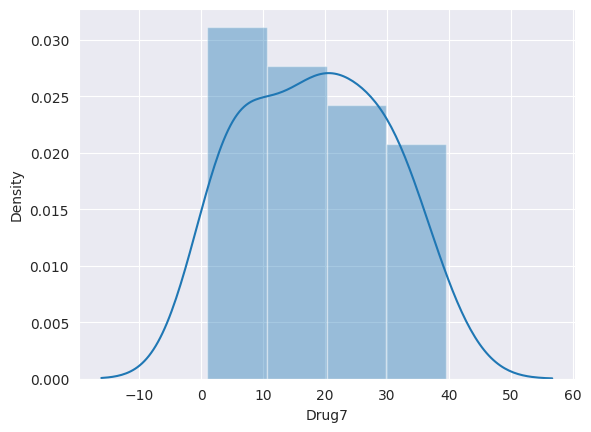

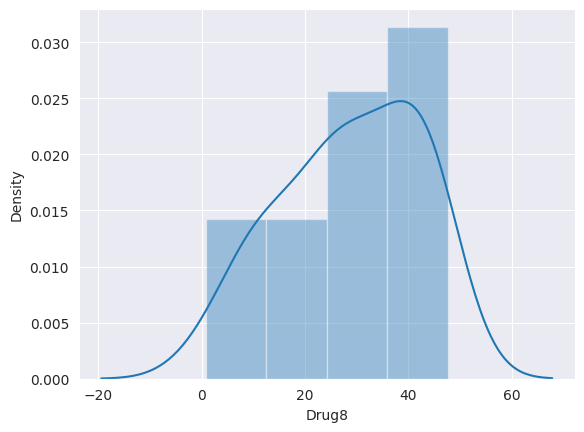

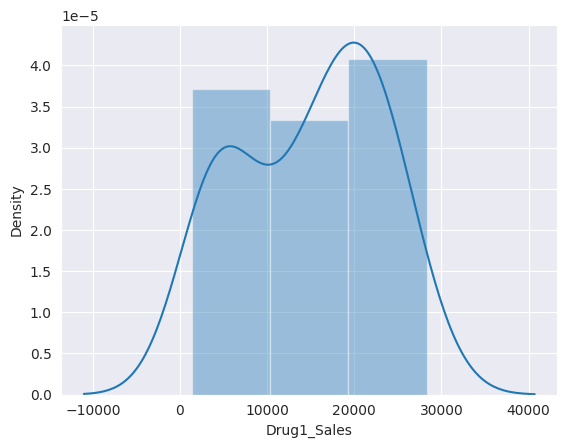

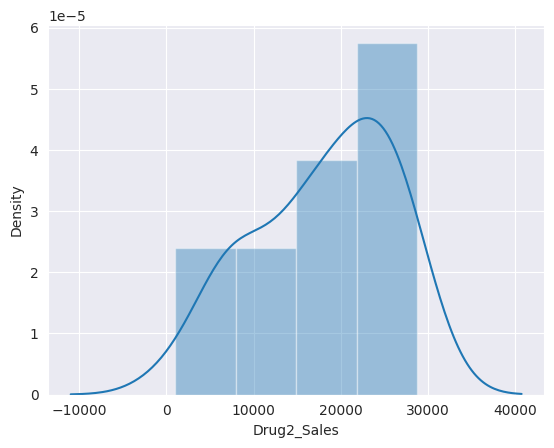

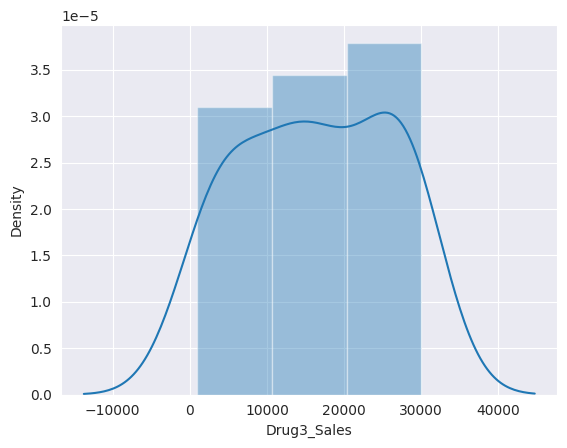

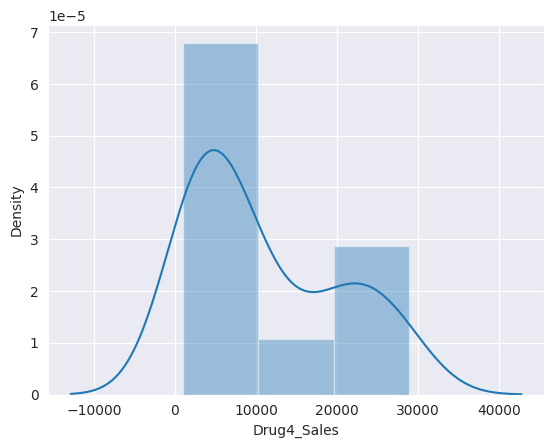

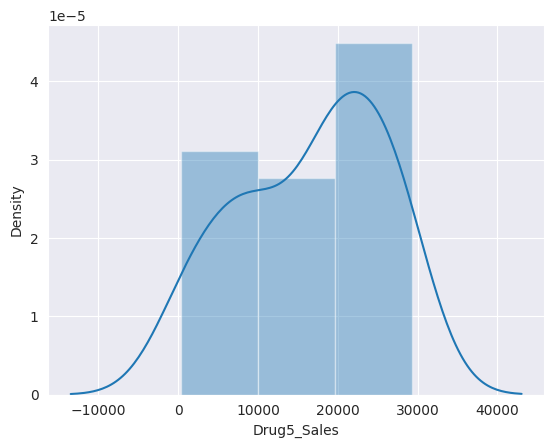

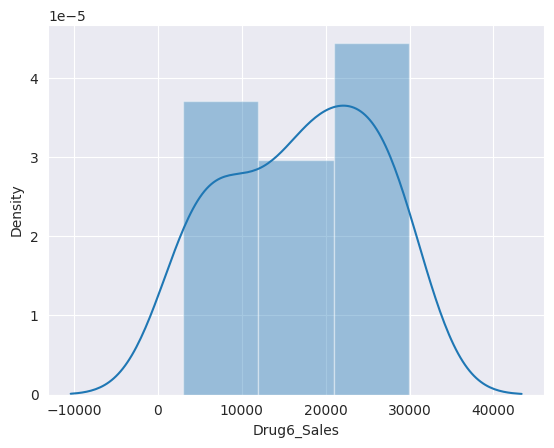

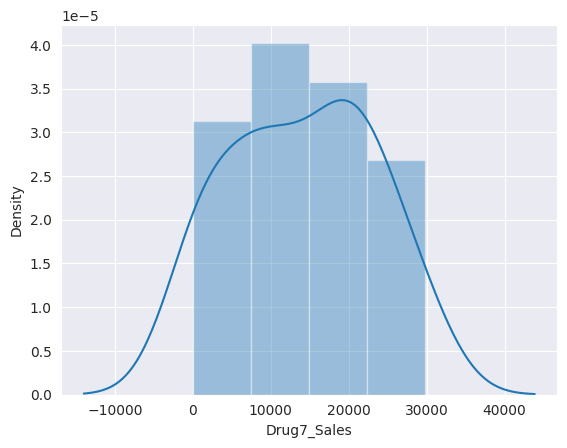

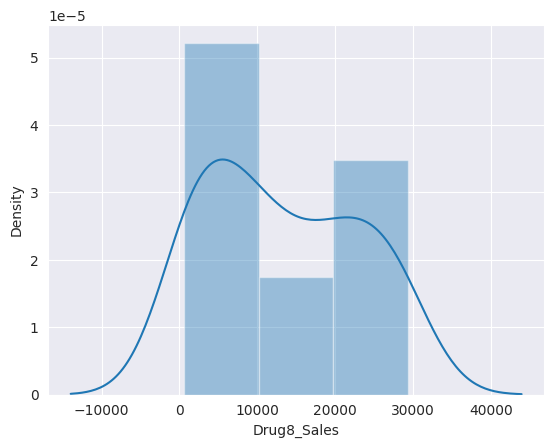

In [ ]:
for col in df.columns:
  sns.distplot(df[col])
  plt.show()

In [ ]:
df.describe()

,Drug1,Drug2,Drug3,Drug4,Drug5,Drug6,Drug7,Drug8,Drug1_Sales,Drug2_Sales,Drug3_Sales,Drug4_Sales,Drug5_Sales,Drug6_Sales,Drug7_Sales,Drug8_Sales
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,26.596912,23.056228,25.743793,21.871157,31.087575,25.463156,18.416617,28.736051,14853.236789,18029.157158,16361.947371,11071.084867,16562.637748,17032.745279,14046.926173,13243.808153
std,18.005125,14.297534,15.480115,13.453004,13.260306,12.546928,11.253545,13.302577,8152.182159,7862.460725,9690.834960,9131.039918,9074.982400,8794.779728,9232.148985,9603.750929
min,2.293934,0.839749,0.914703,0.375320,5.905863,3.136373,1.010019,0.836810,1354.365981,990.196232,984.359077,991.012848,330.739762,2994.657047,40.391291,630.477031
25%,8.815000,11.304000,9.321850,10.915689,23.664319,19.603317,8.361713,18.619755,6078.158769,12854.706578,8223.676041,3026.309520,9131.335546,9408.726728,7833.618489,3968.008841
50%,29.606212,21.112763,26.347499,18.924424,31.378047,23.893759,18.809086,29.926093,16949.334101,19753.688725,15820.377428,7602.187472,18746.307833,17990.460561,14019.560910,10980.185313
75%,42.845607,35.923722,39.138191,31.548636,42.712524,31.191906,28.029801,40.765278,21176.111841,24274.314938,25915.774328,19989.236430,24428.336965,24435.406879,21349.583753,21348.114871
max,49.688085,48.517550,48.665898,49.561556,49.698259,49.819589,39.542682,47.576386,28320.790702,28784.111495,29987.658486,28947.011093,29243.948039,29985.120828,29835.623718,29335.445685


**Inference from the describe function**

In [ ]:
np.mean(df['Drug1_Sales']/df['Drug1'])

1147.936933935485

In [ ]:
drugs = ['Drug'+str(x) for x in range(1,9)]
for drug in drugs:
  print(drug,end=' - ')
  print(np.mean(df[drug+'_Sales']/df[drug]))

Drug1 - 1147.936933935485
Drug2 - 1784.965448298658
Drug3 - 1605.2608967826025
Drug4 - 2789.700422437547
Drug5 - 717.6036260559857
Drug6 - 1207.0284265679868
Drug7 - 2151.522749579511
Drug8 - 722.2871950062587


**Inference of drug price**

**Weekly Analysis**

In [ ]:
wdf=df.resample("w").mean()

In [ ]:
wdf.head()

,Drug1,Drug2,Drug3,Drug4,Drug5,Drug6,Drug7,Drug8,Drug1_Sales,Drug2_Sales,Drug3_Sales,Drug4_Sales,Drug5_Sales,Drug6_Sales,Drug7_Sales,Drug8_Sales
Date,,,,,,,,,,,,,,,,
2023-05-07,19.852847,25.580483,30.872865,25.400216,25.417537,25.863375,17.287701,21.035063,15537.378124,18170.323552,15987.375134,12677.633199,17651.794756,18629.924981,16982.113508,9151.251188
2023-05-14,28.592481,17.586889,30.497886,14.901481,31.480686,26.792954,11.924204,34.411176,11690.646912,22046.200307,10490.623154,7681.332117,19276.127606,14100.590175,14568.957693,9067.543296
2023-05-21,30.081309,26.132952,21.519593,25.285432,35.360704,26.360432,25.187863,29.859945,17981.119784,20352.113283,19243.961078,8478.843645,13159.461581,17650.702904,11487.260719,22432.741258
2023-05-28,22.468264,22.346567,21.377650,19.403469,32.278846,25.910312,18.941299,29.717089,12204.998078,11238.513743,19007.562165,12210.586483,15703.682129,18482.594020,15969.031170,13562.568376
2023-06-04,45.471522,25.079310,21.218909,30.600258,30.431425,14.702592,19.555524,28.459304,21849.051691,19112.329272,18875.885212,22396.888950,18170.834961,14467.836898,4178.121775,8907.757880


In [ ]:
wdf.tail()

,Drug1,Drug2,Drug3,Drug4,Drug5,Drug6,Drug7,Drug8,Drug1_Sales,Drug2_Sales,Drug3_Sales,Drug4_Sales,Drug5_Sales,Drug6_Sales,Drug7_Sales,Drug8_Sales
Date,,,,,,,,,,,,,,,,
2023-05-07,19.852847,25.580483,30.872865,25.400216,25.417537,25.863375,17.287701,21.035063,15537.378124,18170.323552,15987.375134,12677.633199,17651.794756,18629.924981,16982.113508,9151.251188
2023-05-14,28.592481,17.586889,30.497886,14.901481,31.480686,26.792954,11.924204,34.411176,11690.646912,22046.200307,10490.623154,7681.332117,19276.127606,14100.590175,14568.957693,9067.543296
2023-05-21,30.081309,26.132952,21.519593,25.285432,35.360704,26.360432,25.187863,29.859945,17981.119784,20352.113283,19243.961078,8478.843645,13159.461581,17650.702904,11487.260719,22432.741258
2023-05-28,22.468264,22.346567,21.377650,19.403469,32.278846,25.910312,18.941299,29.717089,12204.998078,11238.513743,19007.562165,12210.586483,15703.682129,18482.594020,15969.031170,13562.568376
2023-06-04,45.471522,25.079310,21.218909,30.600258,30.431425,14.702592,19.555524,28.459304,21849.051691,19112.329272,18875.885212,22396.888950,18170.834961,14467.836898,4178.121775,8907.757880


In [ ]:
wdf.describe()

,Drug1,Drug2,Drug3,Drug4,Drug5,Drug6,Drug7,Drug8,Drug1_Sales,Drug2_Sales,Drug3_Sales,Drug4_Sales,Drug5_Sales,Drug6_Sales,Drug7_Sales,Drug8_Sales
count,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
mean,29.293285,23.345240,25.097381,23.118171,30.993840,23.925933,18.579318,28.696515,15852.638918,18183.896031,16721.081348,12689.056879,16792.380207,16666.329796,12637.096973,12624.372400
std,9.981862,3.533079,5.103949,6.066288,3.618329,5.169817,4.762239,4.842690,4219.426722,4144.848248,3728.036697,5858.205158,2407.856581,2210.198126,5162.107729,5822.609790
min,19.852847,17.586889,21.218909,14.901481,25.417537,14.702592,11.924204,21.035063,11690.646912,11238.513743,10490.623154,7681.332117,13159.461581,14100.590175,4178.121775,8907.757880
25%,22.468264,22.346567,21.377650,19.403469,30.431425,25.863375,17.287701,28.459304,12204.998078,18170.323552,15987.375134,8478.843645,15703.682129,14467.836898,11487.260719,9067.543296
50%,28.592481,25.079310,21.519593,25.285432,31.480686,25.910312,18.941299,29.717089,15537.378124,19112.329272,18875.885212,12210.586483,17651.794756,17650.702904,14568.957693,9151.251188
75%,30.081309,25.580483,30.497886,25.400216,32.278846,26.360432,19.555524,29.859945,17981.119784,20352.113283,19007.562165,12677.633199,18170.834961,18482.594020,15969.031170,13562.568376
max,45.471522,26.132952,30.872865,30.600258,35.360704,26.792954,25.187863,34.411176,21849.051691,22046.200307,19243.961078,22396.888950,19276.127606,18629.924981,16982.113508,22432.741258


**Inferences from the describe function of weekly analysis**

<BarContainer object of 5 artists>

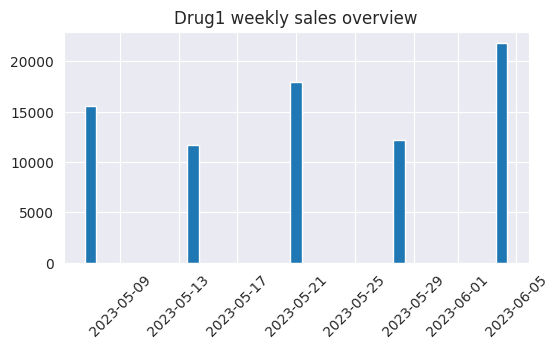

In [ ]:
#Drug1 weekly sales overview
plt.figure(figsize=(6,3),dpi=100)
plt.tick_params(axis='x',rotation=45)
plt.title('Drug1 weekly sales overview')
plt.bar(x=wdf.index,height=wdf.Drug1_Sales)

**Inferences of Drug1 weekly sales:**

<BarContainer object of 5 artists>

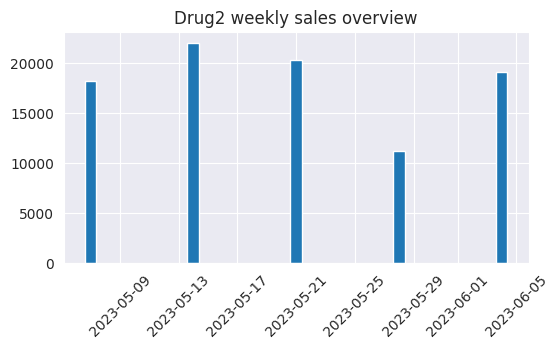

In [ ]:
#Drug2 weekly sales overview
plt.figure(figsize=(6,3),dpi=100)
plt.tick_params(axis='x',rotation=45)
plt.title('Drug2 weekly sales overview')
plt.bar(x=wdf.index,height=wdf.Drug2_Sales)

**Inferences of Drug2 weekly sales:**

<BarContainer object of 5 artists>

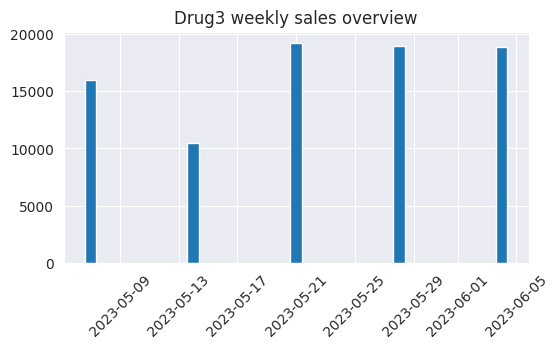

In [ ]:
#Drug3 weekly sales overview
plt.figure(figsize=(6,3),dpi=100)
plt.tick_params(axis='x',rotation=45)
plt.title('Drug3 weekly sales overview')
plt.bar(x=wdf.index,height=wdf.Drug3_Sales)

**Inferences of Drug3 weekly sales:**

<BarContainer object of 5 artists>

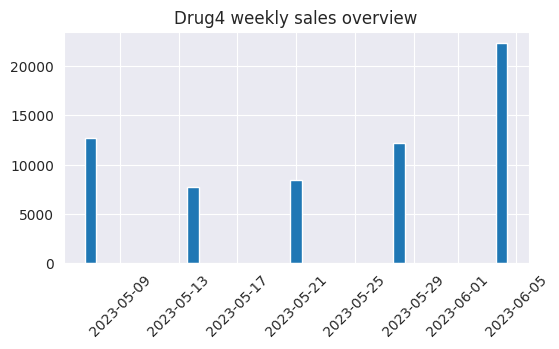

In [ ]:
#Drug4 weekly sales overview
plt.figure(figsize=(6,3),dpi=100)
plt.tick_params(axis='x',rotation=45)
plt.title('Drug4 weekly sales overview')
plt.bar(x=wdf.index,height=wdf.Drug4_Sales)

**Inferences of Drug4 weekly sales:**

<BarContainer object of 5 artists>

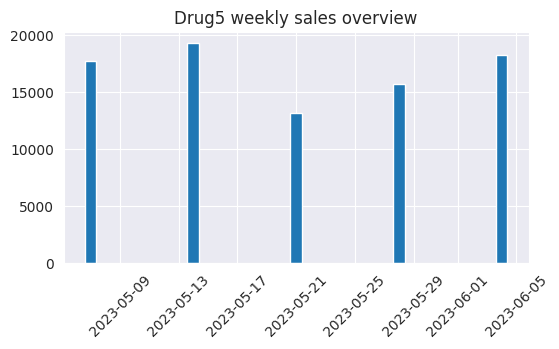

In [ ]:
#Drug5 weekly sales overview
plt.figure(figsize=(6,3),dpi=100)
plt.tick_params(axis='x',rotation=45)
plt.title('Drug5 weekly sales overview')
plt.bar(x=wdf.index,height=wdf.Drug5_Sales)

**Inferences of Drug5 weekly sales:**

<BarContainer object of 5 artists>

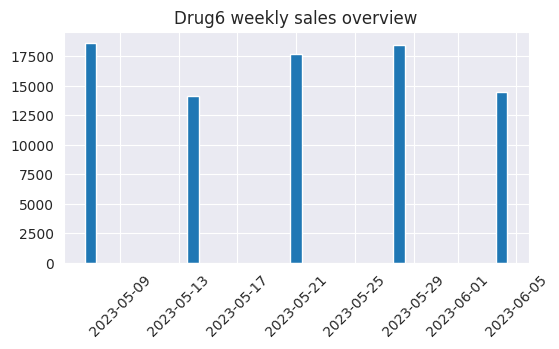

In [ ]:
#Drug6 weekly sales overview
plt.figure(figsize=(6,3),dpi=100)
plt.tick_params(axis='x',rotation=45)
plt.title('Drug6 weekly sales overview')
plt.bar(x=wdf.index,height=wdf.Drug6_Sales)

**Inferences of Drug6 weekly sales:**

<BarContainer object of 5 artists>

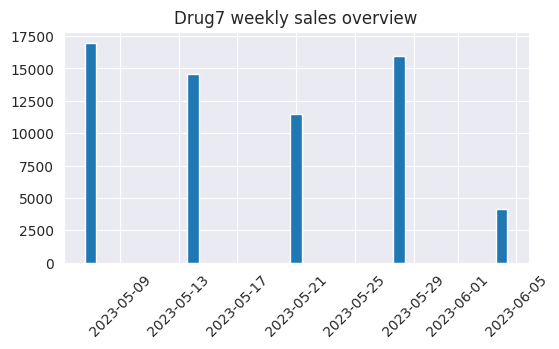

In [ ]:
#Drug7 weekly sales overview
plt.figure(figsize=(6,3),dpi=100)
plt.tick_params(axis='x',rotation=45)
plt.title('Drug7 weekly sales overview')
plt.bar(x=wdf.index,height=wdf.Drug7_Sales)

**Inferences of Drug7 weekly sales:**

<BarContainer object of 5 artists>

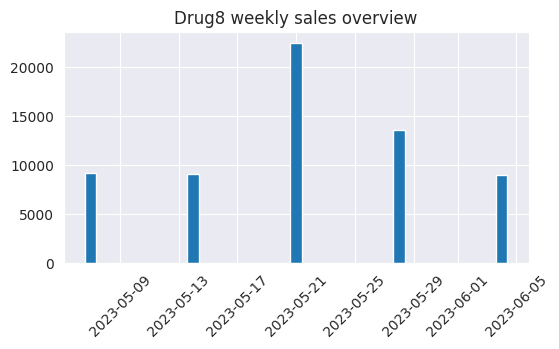

In [ ]:
#Drug8 weekly sales overview
plt.figure(figsize=(6,3),dpi=100)
plt.tick_params(axis='x',rotation=45)
plt.title('Drug8 weekly sales overview')
plt.bar(x=wdf.index,height=wdf.Drug8_Sales)

**Inferences of Drug8 weekly sales:**

# **Monthly Analysis**

In [ ]:
mdf=df.resample('M').mean()

In [ ]:
mdf.head()

,Drug1,Drug2,Drug3,Drug4,Drug5,Drug6,Drug7,Drug8,Drug1_Sales,Drug2_Sales,Drug3_Sales,Drug4_Sales,Drug5_Sales,Drug6_Sales,Drug7_Sales,Drug8_Sales
Date,,,,,,,,,,,,,,,,
2023-05-31,26.596912,23.056228,25.743793,21.871157,31.087575,25.463156,18.416617,28.736051,14853.236789,18029.157158,16361.947371,11071.084867,16562.637748,17032.745279,14046.926173,13243.808153


Problem Statement:

A stock price always fluctuates, but is there a relation between a closing price and its moving averages? 

An analyst wants to showcase how the stock would move, he has 5 years of stock price data with him on which he needs to perform the analysis. 

Objective: 
Find the possible futuristic movement of the stock "GOOG" based on its price for the last 5 years. 


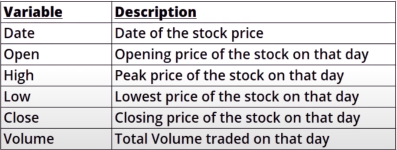
